In [ ]:
import os
import shutil
import random
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Step 2: Set Paths
original_dataset_path = "/content/drive/MyDrive/Black Pepper/dataset"
base_output_path = "/content/drive/MyDrive/Black Pepper/out"

train_folder = os.path.join(base_output_path, "train")
validation_folder = os.path.join(base_output_path, "validation")
test_folder = os.path.join(base_output_path, "test")

# Create output folders and classes
for folder in [train_folder, validation_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)
    for class_name in ["healthy", "leaf_blight", "yellow_mottle_virus"]:
        os.makedirs(os.path.join(folder, class_name), exist_ok=True)

# Copy Images to Train, Validation, and Test Folders
def split_data(original_path, train_path, validation_path, test_path, split_ratio=(0.8, 0.1, 0.1)):
    image_files = os.listdir(original_path)
    random.shuffle(image_files)

    total_images = len(image_files)
    num_train = int(total_images * split_ratio[0])
    num_validation = int(total_images * split_ratio[1])

    for i, filename in enumerate(image_files):
        src_path = os.path.join(original_path, filename)

        if i < num_train:
            dst_path = os.path.join(train_path, original_path.split('/')[-1], filename)
        elif i < num_train + num_validation:
            dst_path = os.path.join(validation_path, original_path.split('/')[-1], filename)
        else:
            dst_path = os.path.join(test_path, original_path.split('/')[-1], filename)

        shutil.copy(src_path, dst_path)

# Split data for each class
for class_name in ["healthy", "leaf_blight", "yellow_mottle_virus"]:
    split_data(os.path.join(original_dataset_path, class_name), train_folder, validation_folder, test_folder)


In [ ]:
def count_files_in_folders(folder_path):
    # Initialize counters
    total_files = 0

    # Walk through the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        # Count files in the current folder
        files_count = len(files)
        total_files += files_count

        # Display the result for the current folder
        print(f"Folder: {root}, Files: {files_count}")

    # Display the total count
    print(f"\nTotal Files in {folder_path}: {total_files}")

# the path to analyze
folder_path = '/content/drive/MyDrive/Black Pepper/out'
count_files_in_folders(folder_path)


Folder: /content/drive/MyDrive/Black Pepper/out, Files: 0
Folder: /content/drive/MyDrive/Black Pepper/out/train, Files: 0
Folder: /content/drive/MyDrive/Black Pepper/out/train/healthy, Files: 218
Folder: /content/drive/MyDrive/Black Pepper/out/train/leaf_blight, Files: 218
Folder: /content/drive/MyDrive/Black Pepper/out/train/yellow_mottle_virus, Files: 218
Folder: /content/drive/MyDrive/Black Pepper/out/validation, Files: 0
Folder: /content/drive/MyDrive/Black Pepper/out/validation/healthy, Files: 27
Folder: /content/drive/MyDrive/Black Pepper/out/validation/leaf_blight, Files: 27
Folder: /content/drive/MyDrive/Black Pepper/out/validation/yellow_mottle_virus, Files: 27
Folder: /content/drive/MyDrive/Black Pepper/out/test, Files: 0
Folder: /content/drive/MyDrive/Black Pepper/out/test/healthy, Files: 28
Folder: /content/drive/MyDrive/Black Pepper/out/test/leaf_blight, Files: 28
Folder: /content/drive/MyDrive/Black Pepper/out/test/yellow_mottle_virus, Files: 28

Total Files in /content/d

In [ ]:
# Implement MobileNet Model
def create_model(num_classes):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Replace num_classes with the number of classes in your dataset
num_classes = 3
model = create_model(num_classes)

# Compile and Train the Model
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_folder, target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_folder, target_size=(224, 224), batch_size=32, class_mode='categorical')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=50, validation_data=validation_generator)

# Save the Model
model.save('/content/drive/MyDrive/Black Pepper/models/model.h5')

17225924/17225924 [==============================] - 0s 0us/step
Found 654 images belonging to 3 classes.
Found 81 images belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 159s 7s/step - loss: 0.3490 - accuracy: 0.8838 - val_loss: 7.9086 - val_accuracy: 0.3951
Epoch 2/10
21/21 [==============================] - 144s 7s/step - loss: 0.0287 - accuracy: 0.9924 - val_loss: 2.5106 - val_accuracy: 0.7037
Epoch 3/10
21/21 [==============================] - 145s 7s/step - loss: 0.0455 - accuracy: 0.9847 - val_loss: 2.7367 - val_accuracy: 0.7531
Epoch 4/10
21/21 [==============================] - 142s 7s/step - loss: 0.0347 - accuracy: 0.9908 - val_loss: 1.1040 - val_accuracy: 0.8519
Epoch 5/10
21/21 [==============================] - 144s 7s/step - loss: 0.0392 - accuracy: 0.9862 - val_loss: 0.8782 - val_accuracy: 0.8642
Epoch 6/10
21/21 [==============================] - 146s 7s/step - loss: 0.0369 - accuracy: 0.9924 - val_loss: 0.7968 - val_accuracy: 0.9012
Epoch 7/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Getting Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = validation_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

3/3 [==============================] - 4s 919ms/step
Confusion Matrix:
[[ 9 11  7]
 [10  8  9]
 [ 8 10  9]]


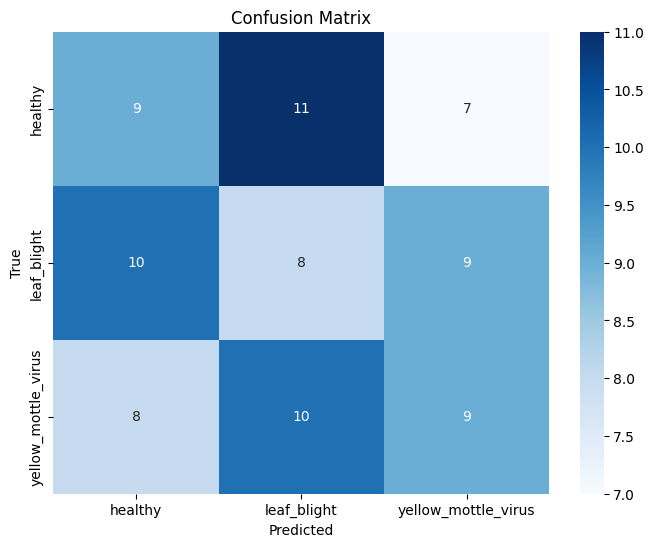

In [ ]:
#confusion_matrix table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming true_labels and predicted_labels are available
# Example: true_labels, predicted_labels = get_true_and_predicted_labels()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model_path = '/content/drive/MyDrive/Black Pepper/models/model.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Function to preprocess an image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values
    return img_array

# Example: Replace 'path/to/your/test/image.jpg' with the path to your test image
test_image_path = '/content/drive/MyDrive/Black Pepper/samples/1.png'
preprocessed_image = preprocess_image(test_image_path)

# Make prediction
predictions = loaded_model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])

# Display the result
class_names = ["healthy", "leaf_blight", "yellow_mottle"]
predicted_class_name = class_names[predicted_class]
print("Predicted class:", predicted_class_name)


1/1 [==============================] - 2s 2s/step
Predicted class: leaf_blight
